<a href="https://colab.research.google.com/github/karginb/classifications_with_tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Neural Network Regression with TensorFlow


**Input layer**: shape	Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)

**Hidden layer(s)**:	Problem specific, minimum = 1, maximum = unlimited
Neurons per hidden layer	Problem specific, generally 10 to 100

**Output layer**: shape	Same shape as desired prediction shape (e.g. 1 for house price)

**Hidden activation**:	Usually ReLU (rectified linear unit)

**Output activation**:	None, ReLU, logistic/tanh

**Loss function**:	MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers

**Optimizer**:	SGD (stochastic gradient descent), Adam

In [ ]:
import tensorflow as tf
print(tf.__version__)
import datetime
print(datetime.datetime.now())

2.13.0
2023-09-10 20:12:21.517347


## Creating data to view and fit

Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

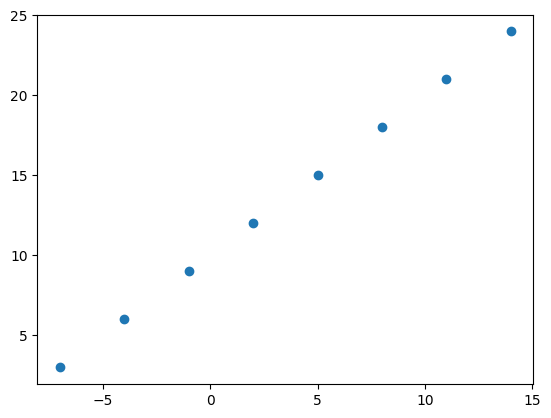

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)


## Steps in modelling with TensorFlow
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

**Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

**Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(1))

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 647ms/step - loss: 15.9280 - mae: 15.9280
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 15.6467 - mae: 15.6467
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 15.3655 - mae: 15.3655
Epoch 4/5
1/1 [==============================] - 0s 31ms/step - loss: 15.0842 - mae: 15.0842
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 14.8536 - mae: 14.8536


In [ ]:
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [ ]:
 #output should've something close to 27.0
model.predict([17.0])

1/1 [==============================] - 0s 153ms/step


array([[-6.085585]], dtype=float32)

## Improving a model
How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

**Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

**Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

**Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).






In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(1))

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


model.fit(tf.expand_dims(X,axis = -1),y,epochs = 100)


Epoch 1/100
1/1 [==============================] - 1s 580ms/step - loss: 10.3976 - mae: 10.3976
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 10.2651 - mae: 10.2651
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1326 - mae: 10.1326
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0001 - mae: 10.0001
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 9.8676 - mae: 9.8676
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 9.7351 - mae: 9.7351
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 9.6026 - mae: 9.6026
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 9.4701 - mae: 9.4701
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 9.3376 - mae: 9.3376
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 9.2051 - mae: 9.2051
Epoch 11/100
1/1 [==============================] - 0s 19ms/

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 101ms/step


array([[30.15884]], dtype=float32)

In [ ]:
# Let's work on more complex model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(10, activation = "relu"))
model.add(tf.keras.layers.Dense(1))

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis = -1),y,epochs = 100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 11.8810 - mae: 11.8810
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 11.0764 - mae: 11.0764
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.2525 - mae: 10.2525
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 9.4012 - mae: 9.4012
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 8.5142 - mae: 8.5142
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 7.6124 - mae: 7.6124
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 6.7619 - mae: 6.7619
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 5.9476 - mae: 5.9476
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 5.0403 - mae: 5.0403
Epoch 10/100
1/1 [==============================] - 0s 29ms/step - loss: 4.4785 - mae: 4.4785
Epoch 11/100
1/1 [==============================] - 0s 24ms/step 

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 192ms/step


array([[31.842981]], dtype=float32)

## Evaluating a model

It's a good idea to visualize:

* **The data**- what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

In [ ]:
X = np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
y = np.arange(-90,110,4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
y = X + 10

y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester)

🔑 **Note**: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.


In [ ]:
len(X),len(y)

(50, 50)

In [ ]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

## Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

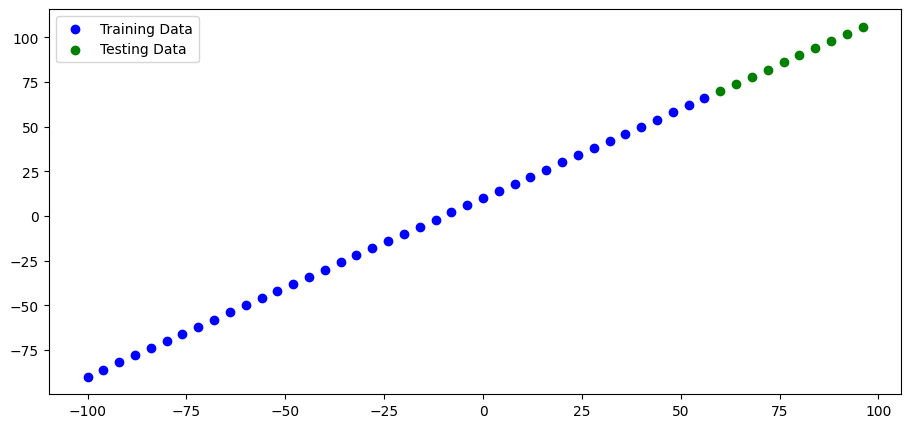

In [ ]:
plt.figure(figsize=(11,5))

plt.scatter(X_train,y_train,color = "blue", label = "Training Data")

plt.scatter(X_test,y_test, color = "green", label = "Testing Data")

plt.legend()

plt.show()


In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(1,input_shape = [1]))

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [ ]:
model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


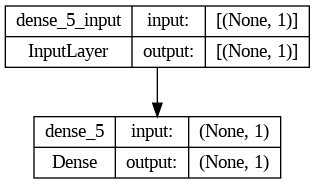

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes = True)


## Visualizing the predictions
Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [ ]:
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 45ms/step


In [ ]:
y_preds

array([[44.483147],
       [47.36165 ],
       [50.24015 ],
       [53.118652],
       [55.997154],
       [58.875656],
       [61.754154],
       [64.63265 ],
       [67.51116 ],
       [70.389656]], dtype=float32)

In [ ]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
  plt.figure(figsize = (8,8))

  plt.scatter(train_data, train_labels, color = "green", label = "Traninig Data")

  plt.scatter(test_data, test_labels, color = "blue", label = "Testing Data")

  plt.scatter(test_data, predictions, color = "red", label = "Predictions")

  plt.legend()

  plt.show()


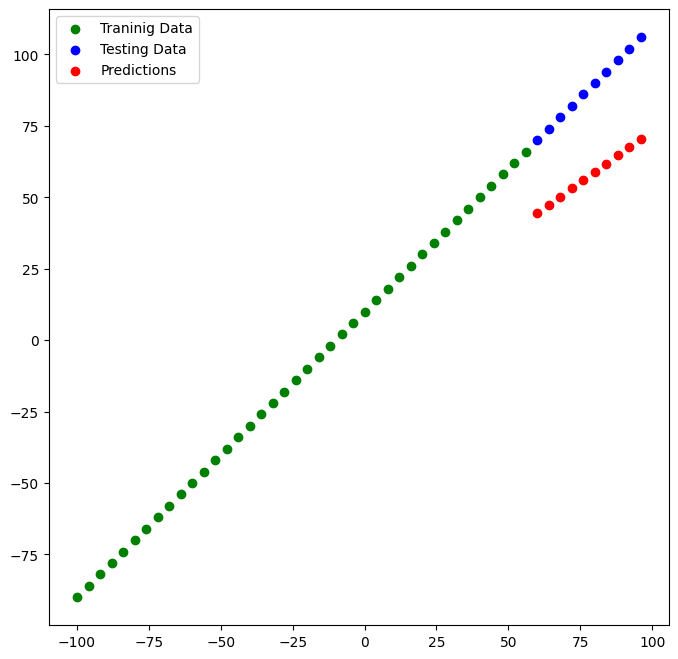

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

## Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile ste

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 160ms/step - loss: 30.5636 - mae: 30.5636


[30.563594818115234, 30.563594818115234]

In [ ]:
# Mean Absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_preds)

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([43.516853, 40.63835 , 37.75985 , 34.881348, 32.002846, 29.124344,
       26.245846, 23.367348, 20.488838, 17.688274], dtype=float32)>

Huh? That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our y_test and y_preds tensors are different shapes.

Remember how we discussed dealing with different input and output shapes is one the most common issues you'll come across, this is one of those times.

But not to worry.

We can fix it using squeeze(), it'll remove the the 1 dimension from our y_preds tensor, making it the same shape as y_test.

🔑 Note: If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, many errors are the result of mismatched tensors, especially mismatched input and output shapes)

In [ ]:
y_test.shape,y_preds.shape

((10,), (10, 1))

In [ ]:
y_test.shape,y_preds.squeeze().shape

((10,), (10,))

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, y_preds.squeeze().shape)

mae

<tf.Tensor: shape=(), dtype=int32, numpy=78>

In [ ]:
# Calculate the Mean Squared Eroor
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=944.50995>

In [ ]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=30.563596725463867>

In [ ]:

def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1.**Get more data** - get more examples for your model to train on (more opportunities to learn patterns).

2.**Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.

3.**Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1.model_1 --> same as original model, 1 layer, trained for 100 epochs.

2.model_2 --> 2 layers, trained for 100 epochs.

3.model_3 --> 2 layers, trained for 500 epochs.


In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential()

model_1.add(tf.keras.layers.Dense(1))

model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model_1.fit(tf.expand_dims(X_train,axis = -1), y_train, epochs = 100)


Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 47.8113 - mae: 47.8113
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 16.2129 - mae: 16.2129
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 15.1129 - mae: 15.1129
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.2025 - mae: 8.2025
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.6485 - mae: 10.6485
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.8549 - mae: 9.8549
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.9268 - mae: 8.9268
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0844 - mae: 9.0844
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.6240 - mae: 19.6240
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.6071 - mae: 10.6071
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

1/1 [==============================] - 0s 83ms/step


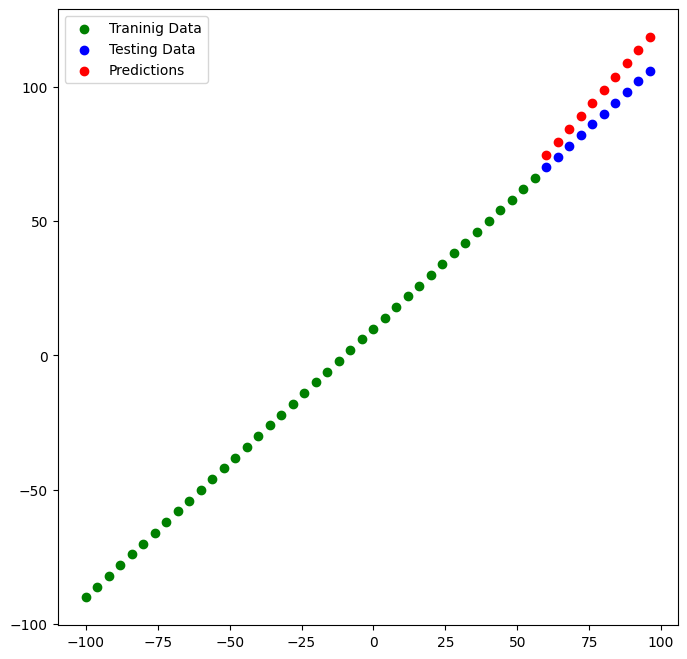

In [ ]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_1)

In [ ]:
mae_1 = mae(y_test,y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test,y_preds_1.squeeze()).numpy()
mae_1,mse_1

(8.416368, 77.188805)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential()

model_2.add(tf.keras.layers.Dense(1))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model_2.fit(tf.expand_dims(X_train,axis = -1),y_train, epochs = 100, verbose = 0)


1/1 [==============================] - 0s 60ms/step


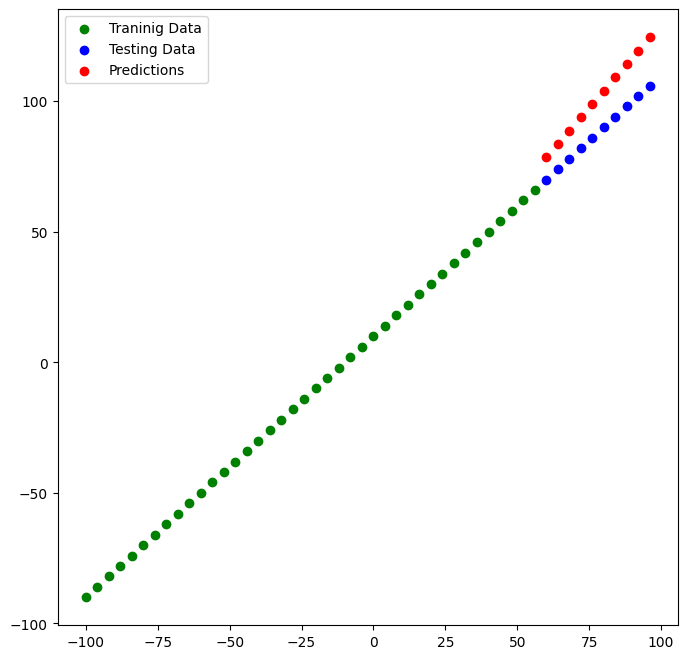

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_2)

In [ ]:
mae_2= mae(y_test,y_preds_2.squeeze()).numpy()
mse_2= mse(y_test,y_preds_2.squeeze()).numpy()
mae_2,mse_2

(13.48723, 192.13095)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential()

model_3.add(tf.keras.layers.Dense(1))
model_3.add(tf.keras.layers.Dense(1))

model_3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500, verbose = 0)

1/1 [==============================] - 0s 56ms/step


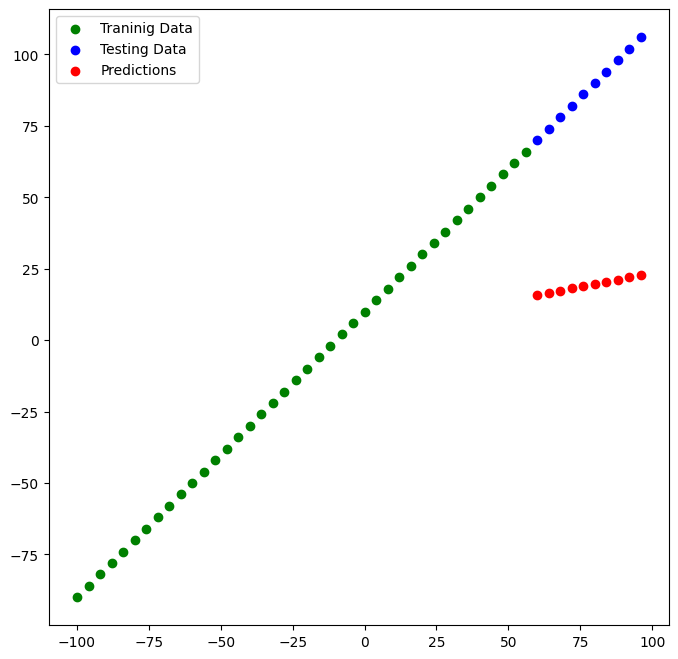

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_3)

In [ ]:
mae_3= mae(y_test,y_preds_3.squeeze()).numpy()
mse_3= mse(y_test,y_preds_3.squeeze()).numpy()
mae_3,mse_3

(68.73033, 4810.3306)

## Comparing results
Now we've got results for 3 similar but slightly different results, let's compare them.

In [ ]:
model_results = {"model_1":{
    "mae":mae_1,
    "mse":mse_1
},"model_2":{
    "mae":mae_2,
    "mse":mse_2
},"model_3":{
    "mae":mae_3,
    "mse":mse_3
}}


In [ ]:

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results)
all_results

,0,1,2
0,model_1,8.416368,77.188805
1,model_2,13.487230,192.130951
2,model_3,68.730331,68.730331


## Saving a model
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

1.The SavedModel format (default).

2.The HDF5 format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

In [ ]:
model_2.save("model_2_saved_format")

In [ ]:
!ls model_2_saved_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [ ]:
model_2.save("model_2_saved_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!ls model_2_saved_HDF5_format.h5

model_2_saved_HDF5_format.h5


## Loading a model
We can load a saved model using the load_model() method.

In [ ]:
load_saved_model = tf.keras.models.load_model("model_2_saved_format")
load_saved_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
saved_model_preds = load_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 54ms/step


True

In [ ]:
loaded_h5_model = tf.keras.models.load_model("model_2_saved_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 63ms/step


True

## Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [ ]:
#from google.colab import files
#files.download("best_model_HDF5_format.h5")



## A larger example
Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

To do, we'll leverage the pubically available Medical Cost dataset available from Kaggle and hosted on GitHub.

🔑 Note: When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the get_dummies() method in pandas.

It converts categorical variables (like the sex, smoker and region columns) into numerical variables using one-hot encoding.

In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_one_hot.drop(["charges"], axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)


In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential()

insurance_model.add(tf.keras.layers.Dense(1))
insurance_model.add(tf.keras.layers.Dense(1))

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

insurance_model.fit(X_train, y_train , epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 9193.0068 - mae: 9193.0068
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7889.8457 - mae: 7889.8457
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7572.5386 - mae: 7572.5386
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7674.2734 - mae: 7674.2734
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7690.2393 - mae: 7690.2393
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7612.4360 - mae: 7612.4360
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7582.4404 - mae: 7582.4404
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7797.8174 - mae: 7797.8174
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7611.7085 - mae: 7611.7085
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7744.9067 - mae: 7744.9067

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8680.9521 - mae: 8680.9521


[8680.9521484375, 8680.9521484375]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

* Increasing the number of layers (2 -> 3).
* Increasing the number of units in each layer (except for the output layer).
* Changing the optimizer (from SGD to Adam).

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential()

insurance_model_2.add(tf.keras.layers.Dense(100))
insurance_model_2.add(tf.keras.layers.Dense(10))
insurance_model_2.add(tf.keras.layers.Dense(1))

insurance_model_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

history = insurance_model_2.fit(X_train, y_train , epochs = 100, verbose = 0)

In [ ]:
# 🔑 Note: For many problems, the Adam optimizer is a great starting choice.
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4755.1538 - mae: 4755.1538


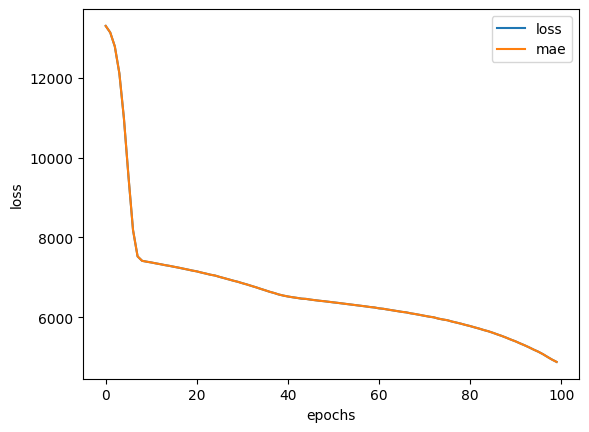

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

## Preprocessing data (normalization and standardization)
A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* Feature scaling:
   
   **Normalizing data** (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
   
   **Standardization** (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
   
   **Which one should you use?**
With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:

* make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:

* MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).

* OneHotEncoder - one hot encode the non-numerical columns.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [ ]:

tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])


insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.2056 - mae: 3170.2056


In [ ]:
insurance_model_2_mae,insurance_model_3_mae

(4755.15380859375, 3170.20556640625)

From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

This is one of the main benefits of normalization: faster convergence time (a fancy way of saying, your model gets to better results faster).

In [ ]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.boston_housing.load_data(test_split = 0.2)

In [ ]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [ ]:
X_test.shape,y_test.shape

((102, 13), (102,))

In [ ]:
tf.random.set_seed(42)

boston_model = tf.keras.Sequential()

boston_model.add(tf.keras.layers.Dense(1))

boston_model.compile(loss = tf.keras.losses.mae,
                     optimizer = tf.keras.optimizers.SGD(),
                     metrics = ["mae"])

history1 = boston_model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
13/13 [==============================] - 0s 2ms/step - loss: 1319.0186 - mae: 1319.0186
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 1420.0667 - mae: 1420.0667
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 1541.0492 - mae: 1541.0492
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 1420.3734 - mae: 1420.3734
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 1491.4087 - mae: 1491.4087
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 1384.2759 - mae: 1384.2759
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 1518.1544 - mae: 1518.1544
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 1503.6799 - mae: 1503.6799
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 1441.1021 - mae: 1441.1021
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 1531.2520 - mae: 1531.2520
Epoch 11/

In [ ]:
boston_model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 942.4326 - mae: 942.4326


[942.4326171875, 942.4326171875]

In [ ]:
scaler = MinMaxScaler()
scaler.fit_transform(X_train,X_test)

array([[1.37816304e-02, 0.00000000e+00, 2.81524927e-01, ...,
        8.93617021e-01, 1.00000000e+00, 4.68818985e-01],
       [1.73654275e-04, 8.25000000e-01, 5.75513196e-02, ...,
        2.23404255e-01, 9.96167230e-01, 3.80794702e-02],
       [5.49837765e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.46089061e-01, 4.22185430e-02],
       ...,
       [3.18534767e-04, 3.50000000e-01, 2.05278592e-01, ...,
        4.57446809e-01, 9.12627969e-01, 1.68322296e-01],
       [2.40852297e-02, 0.00000000e+00, 7.00879765e-01, ...,
        2.23404255e-01, 6.59715568e-01, 3.87969095e-01],
       [9.07048543e-05, 6.00000000e-01, 9.05425220e-02, ...,
        3.19148936e-01, 9.49064501e-01, 7.31236203e-02]])

In [ ]:
X_train_normal = scaler.fit_transform(X_train)
X_test_normal = scaler.fit_transform(X_test)

In [ ]:
X_train_normal[0]

array([0.01378163, 0.        , 0.28152493, 0.        , 0.31481481,
       0.49980635, 0.91452111, 0.29719123, 0.13043478, 0.22753346,
       0.89361702, 1.        , 0.46881898])

In [ ]:
# Creat boston_model_2
tf.random.set_seed(42)

boston_model_2 = tf.keras.Sequential()

boston_model_2.add(tf.keras.layers.Dense(100))
boston_model_2.add(tf.keras.layers.Dense(10))
boston_model_2.add(tf.keras.layers.Dense(1))

boston_model_2.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics = ["mae"])

history2 = boston_model_2.fit(X_train_normal, y_train, epochs = 200, verbose = 1)

Epoch 1/200
13/13 [==============================] - 1s 2ms/step - loss: 22.3980 - mae: 22.3980
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 20.4985 - mae: 20.4985
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 18.1800 - mae: 18.1800
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 15.0563 - mae: 15.0563
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 11.3998 - mae: 11.3998
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 8.9980 - mae: 8.9980
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 8.0816 - mae: 8.0816
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 7.5737 - mae: 7.5737
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 6.9683 - mae: 6.9683
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 6.4657 - mae: 6.4657
Epoch 11/200
13/13 [=============================

In [ ]:
boston_model_2.evaluate(X_test_normal,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 6.6354 - mae: 6.6354


[6.635444641113281, 6.635444641113281]

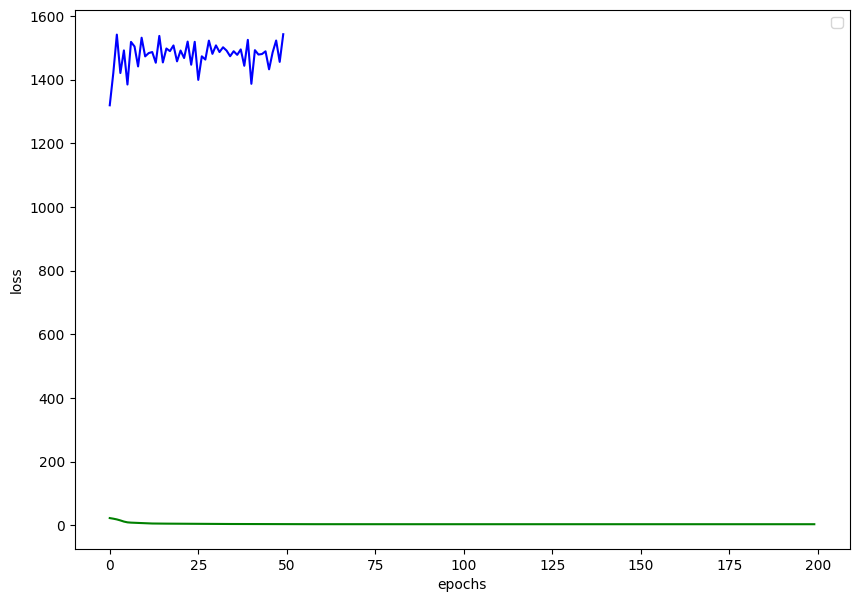

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.plot(history2.history["loss"], color = "green")
plt.plot(history1.history["loss"], color = "blue")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()